In [84]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
%matplotlib inline

## Read in Data

In [11]:
data = pd.read_csv('FMADatasetTrans-cleaned.csv').drop('Unnamed: 0',axis=1)
response = pd.Series.from_csv('response.csv')
data

C:\Users\ibiyt\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,...,tonnetz.37,tonnetz.38,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.6
0,-0.695041,0.682179,0.634544,-1.215102,-2.468293,0.642706,0.575714,0.582495,0.471984,0.508989,...,-1.918384,-1.046551,-1.561353,-1.755760,-1.530469,-8.973411,0.354692,-1.950820,-2.151796,-1.723735
1,-0.760227,0.521350,0.817554,-1.239133,-0.839564,0.479206,0.267598,0.582495,0.471984,0.508989,...,-1.408139,-1.020470,-1.145736,-1.475555,-1.571847,-6.368528,0.434410,-1.681186,-1.761941,-1.803182
2,-0.043759,0.662830,0.924633,-0.030882,-8.062676,0.414608,0.963518,0.834591,0.749667,1.000000,...,-1.734801,-1.081774,-0.893442,-1.532135,-1.298345,-13.384400,0.209889,-1.981206,-2.011986,-2.208358
3,-0.642571,0.504525,0.560467,-1.194809,-0.678925,0.426055,0.893843,0.582495,0.471984,0.508989,...,-1.299278,-0.527856,-0.971555,-1.192269,-1.172752,-5.568277,0.266398,-2.469772,-2.578564,-2.500909
4,-1.301601,0.228931,0.607130,-0.164302,-8.809239,0.772947,0.158379,0.582395,0.403694,0.508901,...,-1.661267,-1.367831,-1.443515,-1.800587,-1.600945,-6.299742,0.330474,-2.112630,-2.159863,-2.296970
5,-0.757218,0.745729,0.265701,-0.339966,-6.833896,0.399460,0.609120,0.582395,0.403694,0.508901,...,-1.497614,-1.189869,-0.965601,-1.474211,-1.386809,-4.053889,0.334511,-2.573458,-2.751139,-2.279563
6,-0.031507,0.420091,0.075622,-0.713526,-10.809530,0.086959,0.162070,0.582395,0.403694,0.508901,...,-1.396339,-0.937361,-0.920516,-1.216338,-1.142395,-8.668003,0.185671,-2.517523,-2.825940,-2.317603
7,-0.364528,0.357980,0.823949,-0.086875,-4.043782,0.566585,0.090827,0.582395,0.403694,0.508901,...,-1.512047,-1.025282,-1.133785,-1.277315,-1.326606,-8.978375,0.192230,-2.346021,-2.511847,-2.402242
8,-0.087956,0.428512,0.642066,-0.072779,-3.712012,0.485836,0.787782,0.377929,0.290646,0.330237,...,-1.737546,-1.208318,-1.142666,-1.508760,-1.398896,-6.967840,0.242180,-2.156444,-2.263603,-2.264805
9,-1.003306,0.423083,0.487799,-0.289769,-5.836009,0.453329,0.649672,0.377929,0.290646,0.330237,...,-1.464322,-0.927895,-1.109746,-1.352761,-1.275104,-8.378796,0.315843,-1.955858,-2.201462,-1.656419


In [22]:
le = LabelEncoder() #encode variables so that they can be put into a model
responseEncoded = le.fit_transform(response)
responseEncoded

array([ 7, 12, 13, ...,  6,  6,  6], dtype=int64)

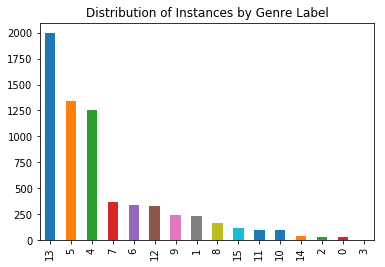

In [36]:
pd.Series(responseEncoded).value_counts().plot(kind='bar',title='Distribution of Instances by Genre Label') 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data,responseEncoded,test_size=.4)

In [91]:
#oversampling with smote so we can train using synthetic instances
unique,counts = np.unique(y_train,return_counts=True)
sm = SMOTE(ratio=0.7,random_state=146,m_neighbors=min(counts)-1,k_neighbors=min(counts)-1)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train,y_train)

C:\Users\ibiyt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


13    1245
15     871
7      871
14     871
6      871
5      871
12     871
4      871
11     871
3      871
10     871
2      871
9      871
1      871
8      871
0      871
dtype: int64


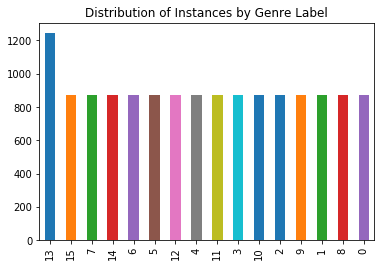

In [138]:
pd.Series(y_SMOTE).value_counts().plot(kind='bar',title='Distribution of Instances by Genre Label')
counts=pd.Series(y_SMOTE).value_counts() #get the raw counts to know how much to undersample too.
print(counts)
k=min(counts)

In [146]:
#undersample majority class
def bootstrap_undersampling(X,y,k):
    '''
    Uses undersampling to balance dataset. Takes the length of any smaller minority class and gets its size, k.
    Using that it randomly samples instances of the majority class and merges that resampled dataset with the other
    minority classes.
    '''
    classes = pd.Series(y)
    classCount=classes.value_counts()
    
    majority = classCount.loc[classCount==max(classCount)].index[0]
    majorityIndex=list(classes.loc[classes==majority].index)
    minorityIndex=list(classes.loc[classes!=majority].index)
    
    bootstrapSamples = np.random.choice(majorityIndex,size=k)
    majorityXUndersampled=X[bootstrapSamples,:]
    majorityYUndersampled=y[bootstrapSamples]
    
    minorityX= X[minorityIndex,:]
    minorityY = y[minorityIndex]
    
    X_bootstrap = np.vstack((majorityXUndersampled,minorityX))
    y_bootstrap = np.vstack((majorityYUndersampled.reshape((-1,1)),minorityY.reshape(-1,1)))
    
    return X_bootstrap, y_bootstrap

def bootstrapDataframe(X,y,k,columns=X_train.columns):
    '''
    Develops shuffled dataframes of the bootstrapped dataset created.
    '''
    X_bootstrap,y_bootstrap=bootstrap_undersampling(X,y,k) #resample to lower

    X_bootstrap = pd.DataFrame(data=X_bootstrap,columns=X_train.columns)
    y_bootstrap = pd.Series(data=y_bootstrap.flatten())

    X_bootstrap=X_bootstrap.sample(frac=1)
    y_bootstrap=y_bootstrap[X_bootstrap.index]
    return X_bootstrap, y_bootstrap

def bootstrap_samples(X,y,k,iterations=10):
    '''
    Creates several bootstrapped datasets based on the number of iterations (default=10)
    '''
    return [bootstrapDataframe(X,y,k) for i in range(iterations)]

datasets = bootstrap_samples(X_SMOTE,y_SMOTE,k)

## Visualizing Dataset in 2D

In [74]:
def plotClasses2D(X,y,dimensionality_reduction='PCA',title=None):
    if dimensionality_reduction=='PCA':
        pca = PCA(n_components=2) #two dimensions to plot on two dimensions
        xPlot = pca.fit_transform(X)
    elif dimensionality_reduction=='TSNE':
        tsne = TSNE(n_components=2)
        xPlot = tsne.fit_transform(X)
    else:
        xPlot=X
    df = pd.DataFrame(xPlot)
    if len(df.columns)!=2:
        return "DimError: Can't plot data not in two dimensions"
    df['y'] = y
    plt.figure()
    for label in df['y'].unique():
        sns.regplot(df[0].loc[df['y']==label],df[1].loc[df['y']==label],fit_reg=False,label=label)
        plt.legend(bbox_to_anchor=(1.1,1.05))
        if title!=None:
            plt.title(title)

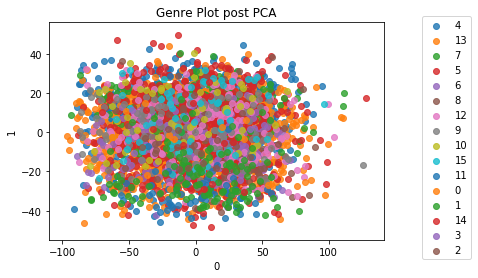

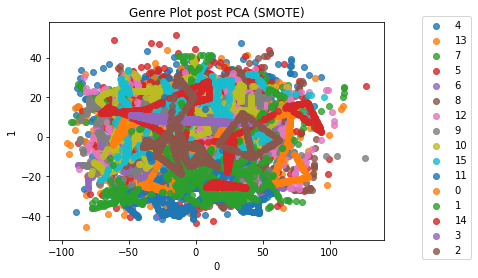

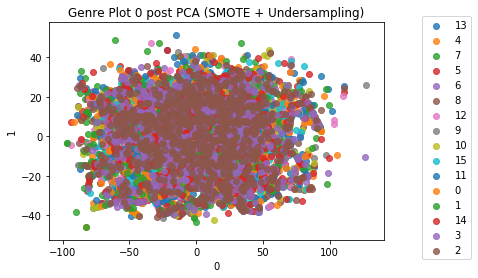

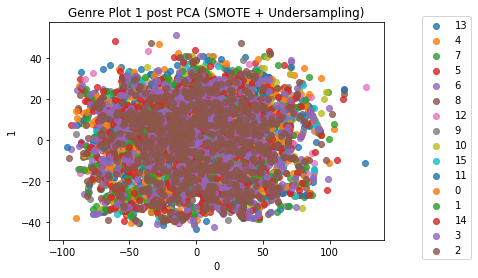

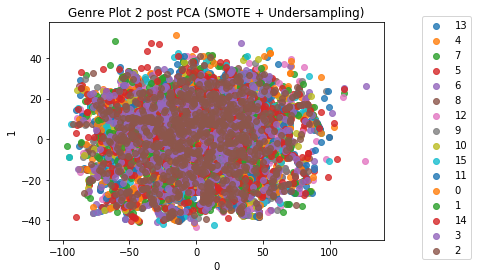

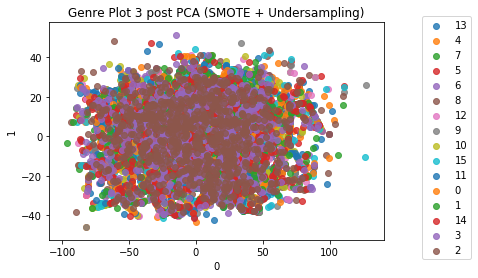

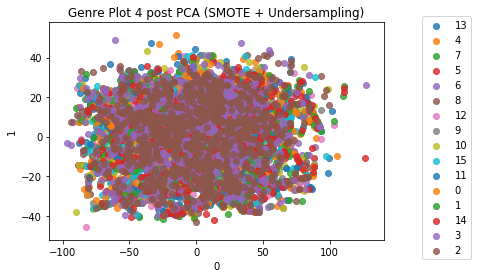

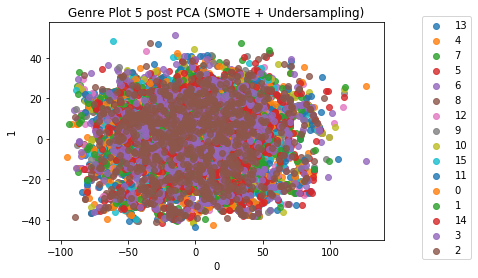

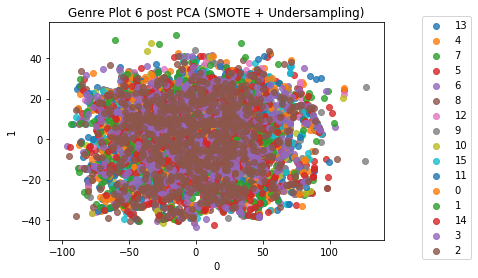

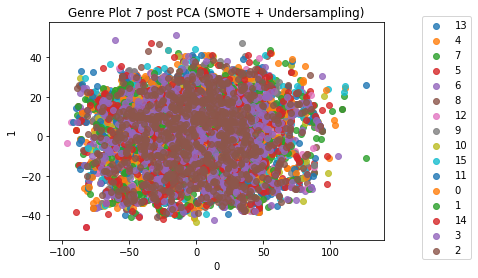

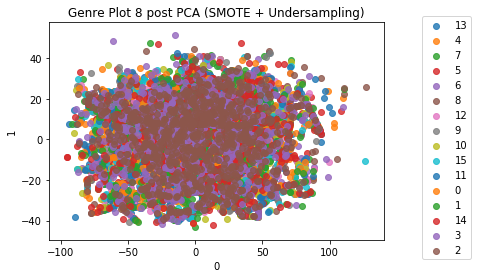

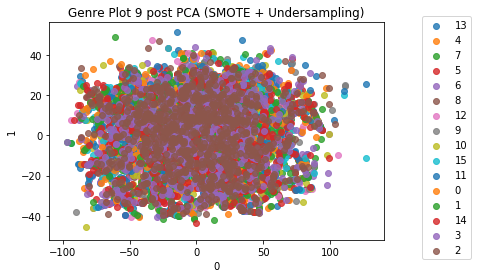

In [156]:
plotClasses2D(X_train,y_train,title='Genre Plot post PCA') #pca
plotClasses2D(X_SMOTE,y_SMOTE,title='Genre Plot post PCA (SMOTE)') #pca with smote seem to be more defined groupings.
for i in range(10):
    plotClasses2D(datasets[i][0],datasets[i][1],title=f'Genre Plot {i} post PCA (SMOTE + Undersampling)') #pca with smote seem to be more defined groupings.

## Classification Baseline SVM

In [89]:
def linearSVMPerformance(X_train,X_test,y_train,y_test):
    '''
    Fits svm (currently linear kernel) to a dataset and then gets the f1 micro averaging score in order to determine performance.
    '''
    svmModel = SVC(kernel='linear')
    svmModel.fit(X_train,y_train)
    y_pred = svmModel.predict(X_test)
    return f1_score(y_true=y_test,y_pred=y_pred,average='micro')

In [90]:
print(f"Performance with SMOTE: {linearSVMPerformance(X_SMOTE,X_test,y_SMOTE,y_test)}")
print(f"Performance with SMOTE: {linearSVMPerformance(X_train,X_test,y_train,y_test)}")

Performance with SMOTE: 0.5405910961466517
Performance with SMOTE: 0.5555555555555556
